### Whatsapp Group chat analysis

For extracting the data 
1. open caht and click on three dots above
2. Select more and then select explore chat
3. Share it with any means

In [64]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px 
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

<<Note>> 
1. Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud.
2. Plotly contains functions that can create entire figures at once

we need to change the format of the date and time of messages. For this I will define a function that can detect whether each line starts with a date as it states that it is a unique message:

In [68]:
import re


def StartWithDateAndTime(s):
    pattern =  r'^\d{2}/\d{2}/\d{4}, \d{1,2}:\d{2}\u202f?(?:am|pm|AM|PM)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

Now creating a function to extract the usernames in the chats as Authors:

In [69]:
def FindAuthor(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

Creating a function to separate all the information from each other so that we could easily use the information as a pandas dataframe:

In [70]:
def GetDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(',')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

The code below will help you to get the data, if you are using an IDE or Jupyter notebook or Google Colab on anything, you can use the code below, you just need to make sure that you write the complete path of your dataset if you are not using Colab or Notebook:

In [71]:
#from google.colab import files
#uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
messageBuffer = [] 
date, time, author = None, None, None
conversation = 'C:\\Users\\Joyi\\OneDrive\\Desktop\\DA and AI\\python\\whatsapp chat analysis\\WhatsApp Chat\\WhatsApp Chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if StartWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = GetDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Let's put the data into a dataframe and have a look at the data:

In [73]:
data = pd.DataFrame(parsedData, columns = ['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
data["Date"] = pd.to_datetime(data["Date"])
print(data.head(20))
print(f"Total messages parsed: {len(parsedData)}")

         Date       Time            Author  \
0  2024-08-14   11:49 am              None   
1  2024-08-14   11:50 am              None   
2  2024-08-14   11:50 am        darkQUEEN😇   
3  2024-08-14   11:50 am        darkQUEEN😇   
4  2024-08-14   11:50 am        darkQUEEN😇   
5  2024-08-14   11:50 am     Mousumi Sahoo   
6  2024-08-14   11:50 am      Sarmin IIEST   
7  2024-08-14   11:50 am        darkQUEEN😇   
8  2024-08-14   11:50 am  Pratik Dey IIEST   
9  2024-08-14   11:50 am     Mousumi Sahoo   
10 2024-08-14   11:50 am        darkQUEEN😇   
11 2024-08-14   11:50 am        darkQUEEN😇   
12 2024-08-14   11:51 am     Mousumi Sahoo   
13 2024-08-14   11:51 am        darkQUEEN😇   
14 2024-08-14   11:51 am  Pratik Dey IIEST   
15 2024-08-14   11:51 am        darkQUEEN😇   
16 2024-08-14   11:51 am     Mousumi Sahoo   
17 2024-08-14   11:51 am     Mousumi Sahoo   
18 2024-08-14   11:51 am              None   
19 2024-08-14   11:51 am     Mousumi Sahoo   

                                 

C:\Users\Joyi\AppData\Local\Temp\ipykernel_3120\1830659819.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Date"] = pd.to_datetime(data["Date"])


To get all the authors

In [74]:
data.Author.unique()

array([None, 'darkQUEEN😇', 'Mousumi Sahoo', 'Sarmin IIEST',
       'Pratik Dey IIEST', 'Biswas'], dtype=object)

# Group wise status

In [ ]:
media_messages = data[data['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

304


In [92]:
import emoji.unicode_codes


def split_count(text):

    emoji_list =[]
    df = regex.findall(r'\X', text)
    for word in df:
            if any(char in emoji.EMOJI_DATA for char in word):
                  emoji_list.append(word)
        
        
    return emoji_list

data ["emoji"] = data["Message"].apply(split_count)
emojis = sum(data['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
data['urlcount'] = data["Message"].apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(data['urlcount'])
total_messages = data.shape[0]

print("bondhugon")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)     

475
bondhugon
Messages: 1233
Media: 304
Emojis: 475
Links: 11


Now we look author wise status

In [97]:
media_messages_data = data[data['Message'] == '<Media omitted>']
messages_data = data.drop(media_messages_data.index)
messages_data.info()
messages_data['Letter_Count'] = messages_data['Message'].apply(lambda s : len(s))
messages_data['Word_Count'] = messages_data['Message'].apply(lambda s : len(s.split(' ')))
messages_data["MessageCount"]=1

l = ['darkQUEEN😇', 'Mousumi Sahoo', 'Sarmin IIEST',
       'Pratik Dey IIEST', 'Biswas']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_data = messages_data[messages_data["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_data.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_data['Word_Count']))/req_data.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_data[media_messages_data['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_data['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_data["urlcount"])
  print('Links Sent', links)
  print()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1232
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      929 non-null    datetime64[ns]
 1   Time      929 non-null    object        
 2   Author    911 non-null    object        
 3   Message   929 non-null    object        
 4   emoji     929 non-null    object        
 5   urlcount  929 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 50.8+ KB
Stats of darkQUEEN😇 -
Messages Sent 288
Words per message 4.309027777777778
Media Messages Sent 185
Emojis Sent 119
Links Sent 0

Stats of Mousumi Sahoo -
Messages Sent 235
Words per message 2.821276595744681
Media Messages Sent 14
Emojis Sent 156
Links Sent 0

Stats of Sarmin IIEST -
Messages Sent 65
Words per message 3.076923076923077
Media Messages Sent 14
Emojis Sent 47
Links Sent 0

Stats of Pratik Dey IIEST -
Messages Sent 311
Words per message 3.47909

In [98]:
total_emojis_list = list([a for b in messages_data.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('🤣', 97)
('😒', 48)
('😂', 37)
('🥺', 27)
('🌚', 21)
('🥳', 17)
('😁', 16)
('🤔', 12)
('😑', 12)
('😇', 11)
('🌝', 9)
('🦶🏻', 9)
('🙂', 8)
('🥹', 7)
('🫠', 7)
('💃🏻', 7)
('🥰', 7)
('😍', 7)
('🫤', 6)
('😐', 6)
('🤢', 6)
('😌', 6)
('😘', 6)
('😮\u200d💨', 5)
('💅🏻', 5)
('💥', 5)
('🛑', 4)
('😅', 4)
('😬', 3)
('🥲', 3)
('😋', 3)
('😝', 3)
('😱', 3)
('😊', 3)
('😎', 2)
('🤪', 2)
('😡', 2)
('☺️', 2)
('🎉', 2)
('😳', 2)
('😪', 2)
('🧐', 2)
('🫱🏻\u200d🫲🏻', 1)
('👌🏻', 1)
('🤘🏻', 1)
('🫢', 1)
('⭐', 1)
('🫥', 1)
('😢', 1)
('🙄', 1)
('🅱️', 1)
('🆑', 1)
('🖕🏻', 1)
('👀', 1)
('😶', 1)
('😭', 1)
('🫂', 1)
('🎓', 1)
('🪜', 1)
('😉', 1)
('🤭', 1)
('❤️', 1)
('💫', 1)
('🤤', 1)
('👻', 1)
('🎊', 1)
('👏🏻', 1)
('🥶', 1)
('💯', 1)
('🤓', 1)
('💜', 1)


# WhatsApp Group Chat Analysis: Word Cloud

A Word Cloud is a graph of words which shows the most used words by representing the most used words bigger than the rest.

> Let's see first the Word Cloud is based on the chats of the whole group. 

There are 18244 words in all the messages.


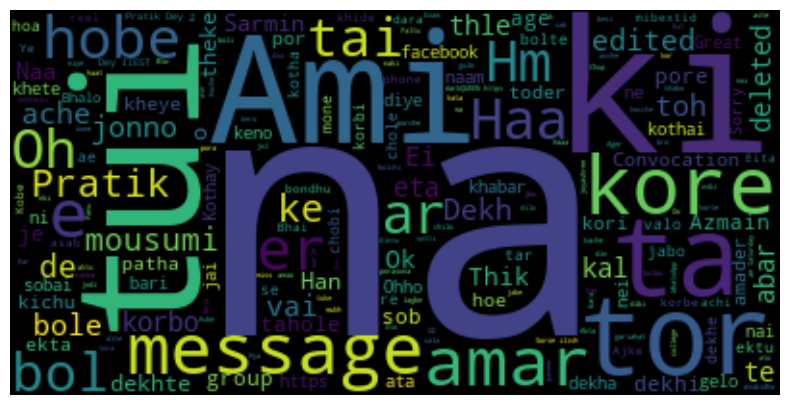

In [103]:
text = " ".join(review for review in messages_data.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> Now tkae a look at the Author wise WordCloud:

Author name darkQUEEN😇


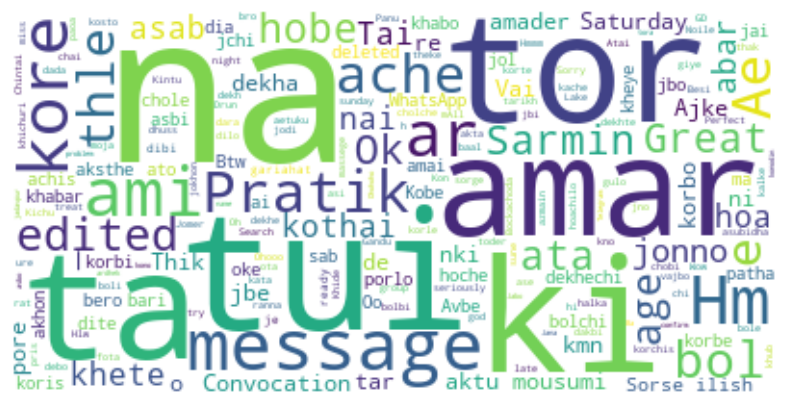

Author name Mousumi Sahoo


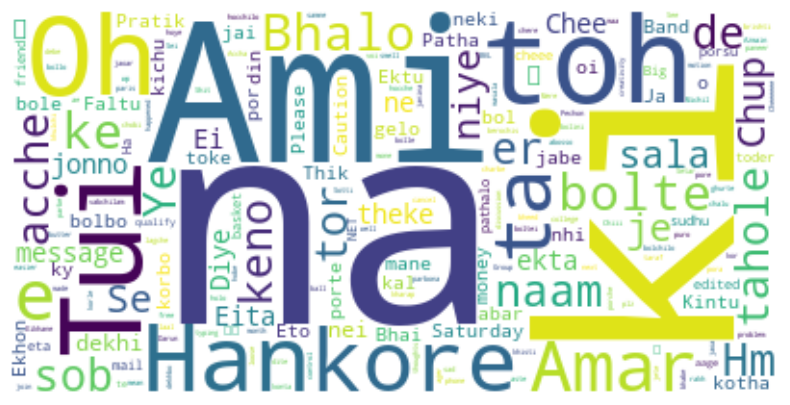

Author name Sarmin IIEST


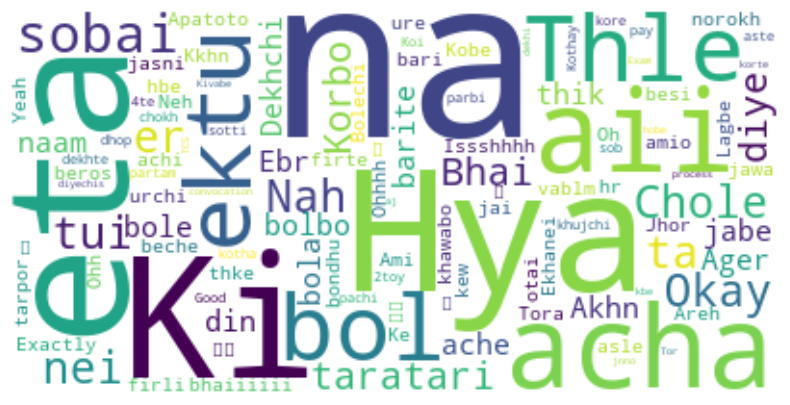

Author name Pratik Dey IIEST


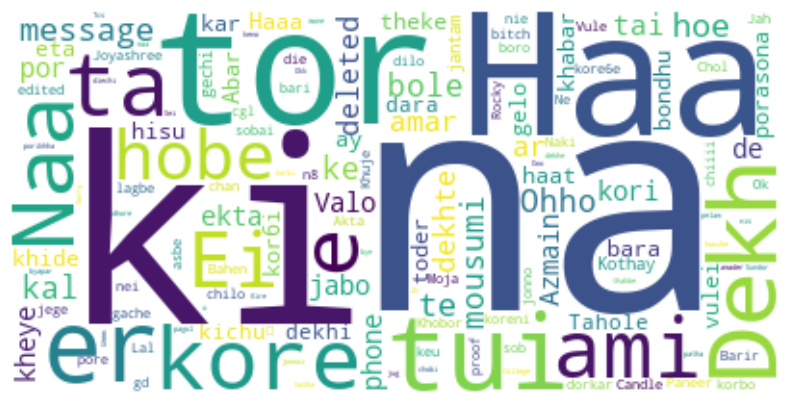

Author name Biswas


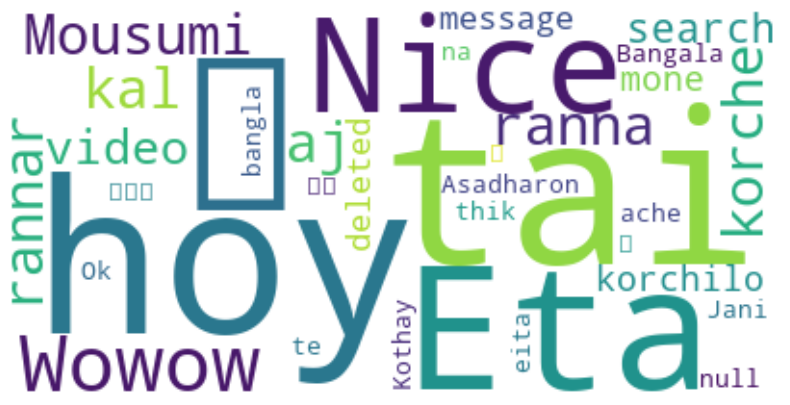

In [102]:
l = ['darkQUEEN😇', 'Mousumi Sahoo', 'Sarmin IIEST', 'Pratik Dey IIEST', 'Biswas']
for i in range(len(l)):
  dummy_df = messages_data[messages_data['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)

  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()